# Calculating for each sample


train size: 898 
test size: 899


/home/heyuser/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy on testing set (MLPclassifier): 0.9733


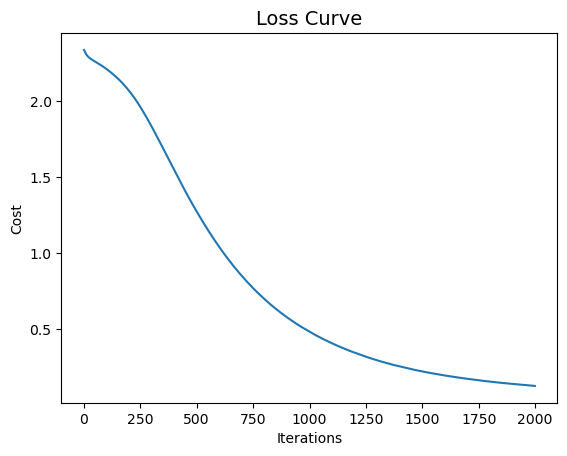

Final loss curve value:  0.12656290014396887


In [5]:
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split

# Custom data
gn = 9

# 1. load 
dt = datasets.load_digits() 
X, y = dt.data, dt.target

#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784')

# partition data with train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5,stratify=y,random_state=gn)


print("train size:",len(X_train),"\ntest size:",len(X_test))



# 2.1 learn classifier
# from sklearn.linear_model import LogisticRegression

# predictor = LogisticRegression(max_iter=2000) 
# predictor.fit(X_train, y_train)

# y_pred = predictor.predict(X_test)
# print("accuracy on testing set (LogR):",  round(metrics.accuracy_score(y_test, y_pred),2))



# 2.2 learn classifier
from sklearn.neural_network import MLPClassifier

predictor = MLPClassifier(hidden_layer_sizes=(64, 32),random_state=9,activation ='logistic',solver='sgd',max_iter=2000)
#predictor = MLPClassifier(random_state=42)
predictor.fit(X_train, y_train)

y_pred = predictor.predict(X_test)
print("accuracy on testing set (MLPclassifier):",  round(metrics.accuracy_score(y_test, y_pred),4))


# 3. Plot the loss curve
plt.plot(predictor.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# 
print("Final loss curve value: ", predictor.loss_curve_[-1])

## Software a) - calculating best number of layers

/home/heyuser/miniconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-10-15 20:36:10,023] A new study created in memory with name: no-name-09e15b64-7901-419d-a82e-77ca18b9cff1


Train size: 898 
Test size: 899


[I 2024-10-15 20:36:21,243] Trial 0 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 72}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:36:22,679] Trial 1 finished with value: 0.12680756395995552 and parameters: {'n_layers': 4, 'n_units_layer_0': 63, 'n_units_layer_1': 104, 'n_units_layer_2': 18, 'n_units_layer_3': 21}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:36:34,874] Trial 2 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 98}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:36:36,454] Trial 3 finished with value: 0.09232480533926585 and parameters: {'n_layers': 4, 'n_units_layer_0': 33, 'n_units_layer_1': 73, 'n_units_layer_2': 24, 'n_units_layer_3': 16}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:36:49,301] Trial 4 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 116}. Best i

Best parameters: {'n_layers': 1, 'n_units_layer_0': 128}
Best accuracy from optimization: 0.9811
Accuracy on testing set (Optimized MLPClassifier): 0.9811


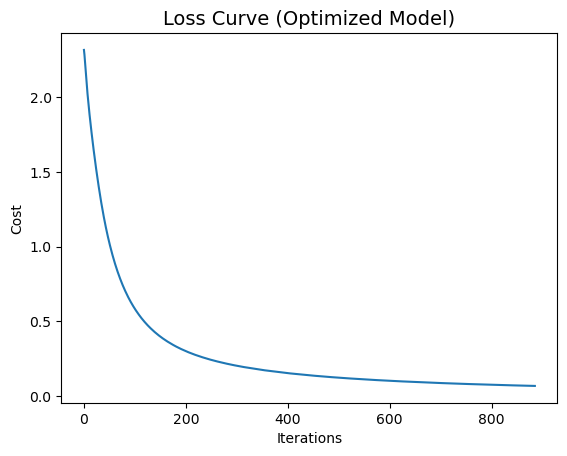

Final loss curve value (Optimized Model): 0.06713430047298773


In [1]:
# Code with optuna
import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import optuna

# Custom data
gn = 9

# 1. Load data (digits dataset)
dt = datasets.load_digits() 
X, y = dt.data, dt.target

# Partition data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, stratify=y, random_state=gn)
print("Train size:", len(X_train), "\nTest size:", len(X_test))

# Define the objective function for Bayesian Optimization
def objective(trial):
    # Sample the number of hidden layers and their sizes
    n_layers = trial.suggest_int('n_layers', 1, 5)  # Number of hidden layers between 1 and 5
    layer_sizes = []
    
    for i in range(n_layers):
        layer_size = trial.suggest_int(f'n_units_layer_{i}', 16, 128)  # Size of each hidden layer between 16 and 128
        layer_sizes.append(layer_size)
    
    # Define the MLPClassifier with the sampled hidden layer sizes
    predictor = MLPClassifier(hidden_layer_sizes=tuple(layer_sizes), 
                              random_state=9, 
                              activation='logistic', 
                              solver='sgd', 
                              max_iter=2000)

    # Fit the classifier
    predictor.fit(X_train, y_train)
    
    # Predict on the test set and calculate accuracy
    y_pred = predictor.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    return accuracy

# Set up Bayesian Optimization using Optuna
study = optuna.create_study(direction='maximize')  # We want to maximize the accuracy
study.optimize(objective, n_trials=30)  # Perform 30 trials

# Output the best parameters and the best score
print(f"Best parameters: {study.best_params}")
print(f"Best accuracy from optimization: {study.best_value:.4f}")

# Train the best model with the optimized parameters
best_params = study.best_params
best_layer_sizes = [best_params[f'n_units_layer_{i}'] for i in range(best_params['n_layers'])]

best_model = MLPClassifier(hidden_layer_sizes=tuple(best_layer_sizes),
                           random_state=9,
                           activation='logistic',
                           solver='sgd',
                           max_iter=2000)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# 2.2 Print the final accuracy
print("Accuracy on testing set (Optimized MLPClassifier):", round(metrics.accuracy_score(y_test, y_pred), 4))

# 3. Plot the loss curve
plt.plot(best_model.loss_curve_)
plt.title("Loss Curve (Optimized Model)", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Print the final loss curve value
print("Final loss curve value (Optimized Model):", best_model.loss_curve_[-1])

## Output da procura por um bom modelo


[I 2024-10-15 20:36:21,243] Trial 0 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 72}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:36:22,679] Trial 1 finished with value: 0.12680756395995552 and parameters: {'n_layers': 4, 'n_units_layer_0': 63, 'n_units_layer_1': 104, 'n_units_layer_2': 18, 'n_units_layer_3': 21}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:36:34,874] Trial 2 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 98}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:36:36,454] Trial 3 finished with value: 0.09232480533926585 and parameters: {'n_layers': 4, 'n_units_layer_0': 33, 'n_units_layer_1': 73, 'n_units_layer_2': 24, 'n_units_layer_3': 16}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:36:49,301] Trial 4 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 116}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:36:50,818] Trial 5 finished with value: 0.10122358175750834 and parameters: {'n_layers': 4, 'n_units_layer_0': 124, 'n_units_layer_1': 95, 'n_units_layer_2': 46, 'n_units_layer_3': 36}. Best is trial 0 with value: 0.9799777530589544.
/home/heyuser/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-10-15 20:37:29,025] Trial 6 finished with value: 0.9710789766407119 and parameters: {'n_layers': 2, 'n_units_layer_0': 41, 'n_units_layer_1': 128}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:37:30,116] Trial 7 finished with value: 0.10122358175750834 and parameters: {'n_layers': 4, 'n_units_layer_0': 17, 'n_units_layer_1': 111, 'n_units_layer_2': 31, 'n_units_layer_3': 63}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:37:30,968] Trial 8 finished with value: 0.10567296996662959 and parameters: {'n_layers': 3, 'n_units_layer_0': 62, 'n_units_layer_1': 97, 'n_units_layer_2': 112}. Best is trial 0 with value: 0.9799777530589544.
/home/heyuser/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-10-15 20:37:59,838] Trial 9 finished with value: 0.9666295884315906 and parameters: {'n_layers': 2, 'n_units_layer_0': 37, 'n_units_layer_1': 66}. Best is trial 0 with value: 0.9799777530589544.
/home/heyuser/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-10-15 20:38:31,939] Trial 10 finished with value: 0.9666295884315906 and parameters: {'n_layers': 2, 'n_units_layer_0': 89, 'n_units_layer_1': 23}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:38:44,727] Trial 11 finished with value: 0.9777530589543938 and parameters: {'n_layers': 1, 'n_units_layer_0': 91}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:38:57,369] Trial 12 finished with value: 0.978865406006674 and parameters: {'n_layers': 1, 'n_units_layer_0': 92}. Best is trial 0 with value: 0.9799777530589544.
/home/heyuser/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-10-15 20:39:30,992] Trial 13 finished with value: 0.9744160177975528 and parameters: {'n_layers': 2, 'n_units_layer_0': 107, 'n_units_layer_1': 17}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:39:32,784] Trial 14 finished with value: 0.09899888765294772 and parameters: {'n_layers': 5, 'n_units_layer_0': 79, 'n_units_layer_1': 45, 'n_units_layer_2': 121, 'n_units_layer_3': 119, 'n_units_layer_4': 47}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:39:45,546] Trial 15 finished with value: 0.9777530589543938 and parameters: {'n_layers': 1, 'n_units_layer_0': 104}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:39:46,480] Trial 16 finished with value: 0.05784204671857619 and parameters: {'n_layers': 3, 'n_units_layer_0': 66, 'n_units_layer_1': 46, 'n_units_layer_2': 80}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:39:58,364] Trial 17 finished with value: 0.9766407119021134 and parameters: {'n_layers': 1, 'n_units_layer_0': 74}. Best is trial 0 with value: 0.9799777530589544.
/home/heyuser/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-10-15 20:40:30,597] Trial 18 finished with value: 0.967741935483871 and parameters: {'n_layers': 2, 'n_units_layer_0': 52, 'n_units_layer_1': 75}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:40:31,383] Trial 19 finished with value: 0.17018909899888765 and parameters: {'n_layers': 3, 'n_units_layer_0': 82, 'n_units_layer_1': 39, 'n_units_layer_2': 78}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:40:43,917] Trial 20 finished with value: 0.9777530589543938 and parameters: {'n_layers': 1, 'n_units_layer_0': 104}. Best is trial 0 with value: 0.9799777530589544.
[I 2024-10-15 20:40:57,289] Trial 21 finished with value: 0.9810901001112347 and parameters: {'n_layers': 1, 'n_units_layer_0': 128}. Best is trial 21 with value: 0.9810901001112347.
[I 2024-10-15 20:41:10,363] Trial 22 finished with value: 0.9766407119021134 and parameters: {'n_layers': 1, 'n_units_layer_0': 119}. Best is trial 21 with value: 0.9810901001112347.
[I 2024-10-15 20:41:54,122] Trial 23 finished with value: 0.9755283648498332 and parameters: {'n_layers': 2, 'n_units_layer_0': 110, 'n_units_layer_1': 123}. Best is trial 21 with value: 0.9810901001112347.
[I 2024-10-15 20:42:04,789] Trial 24 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 98}. Best is trial 21 with value: 0.9810901001112347.
[I 2024-10-15 20:42:45,742] Trial 25 finished with value: 0.967741935483871 and parameters: {'n_layers': 2, 'n_units_layer_0': 127, 'n_units_layer_1': 84}. Best is trial 21 with value: 0.9810901001112347.
[I 2024-10-15 20:42:56,763] Trial 26 finished with value: 0.9755283648498332 and parameters: {'n_layers': 1, 'n_units_layer_0': 53}. Best is trial 21 with value: 0.9810901001112347.
[I 2024-10-15 20:42:58,103] Trial 27 finished with value: 0.10122358175750834 and parameters: {'n_layers': 5, 'n_units_layer_0': 116, 'n_units_layer_1': 59, 'n_units_layer_2': 54, 'n_units_layer_3': 125, 'n_units_layer_4': 124}. Best is trial 21 with value: 0.9810901001112347.
/home/heyuser/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-10-15 20:43:30,482] Trial 28 finished with value: 0.9744160177975528 and parameters: {'n_layers': 2, 'n_units_layer_0': 81, 'n_units_layer_1': 34}. Best is trial 21 with value: 0.9810901001112347.
[I 2024-10-15 20:43:31,623] Trial 29 finished with value: 0.12680756395995552 and parameters: {'n_layers': 3, 'n_units_layer_0': 65, 'n_units_layer_1': 57, 'n_units_layer_2': 97}. Best is trial 21 with value: 0.9810901001112347.
Best parameters: {'n_layers': 1, 'n_units_layer_0': 128}
Best accuracy from optimization: 0.9811
Accuracy on testing set (Optimized MLPClassifier): 0.9811










# CSV file maker with code

In [4]:
import csv
import re

# Sample data from your example (log format)
trial_data = [
    "[I 2024-10-15 20:36:21,243] Trial 0 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 72}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:36:22,679] Trial 1 finished with value: 0.12680756395995552 and parameters: {'n_layers': 4, 'n_units_layer_0': 63, 'n_units_layer_1': 104, 'n_units_layer_2': 18, 'n_units_layer_3': 21}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:36:34,874] Trial 2 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 98}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:36:36,454] Trial 3 finished with value: 0.09232480533926585 and parameters: {'n_layers': 4, 'n_units_layer_0': 33, 'n_units_layer_1': 73, 'n_units_layer_2': 24, 'n_units_layer_3': 16}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:36:21,243] Trial 0 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 72}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:36:22,679] Trial 1 finished with value: 0.12680756395995552 and parameters: {'n_layers': 4, 'n_units_layer_0': 63, 'n_units_layer_1': 104, 'n_units_layer_2': 18, 'n_units_layer_3': 21}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:36:34,874] Trial 2 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 98}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:36:36,454] Trial 3 finished with value: 0.09232480533926585 and parameters: {'n_layers': 4, 'n_units_layer_0': 33, 'n_units_layer_1': 73, 'n_units_layer_2': 24, 'n_units_layer_3': 16}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:36:49,301] Trial 4 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 116}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:36:50,818] Trial 5 finished with value: 0.10122358175750834 and parameters: {'n_layers': 4, 'n_units_layer_0': 124, 'n_units_layer_1': 95, 'n_units_layer_2': 46, 'n_units_layer_3': 36}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:37:29,025] Trial 6 finished with value: 0.9710789766407119 and parameters: {'n_layers': 2, 'n_units_layer_0': 41, 'n_units_layer_1': 128}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:37:30,116] Trial 7 finished with value: 0.10122358175750834 and parameters: {'n_layers': 4, 'n_units_layer_0': 17, 'n_units_layer_1': 111, 'n_units_layer_2': 31, 'n_units_layer_3': 63}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:37:30,968] Trial 8 finished with value: 0.10567296996662959 and parameters: {'n_layers': 3, 'n_units_layer_0': 62, 'n_units_layer_1': 97, 'n_units_layer_2': 112}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:37:59,838] Trial 9 finished with value: 0.9666295884315906 and parameters: {'n_layers': 2, 'n_units_layer_0': 37, 'n_units_layer_1': 66}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:38:31,939] Trial 10 finished with value: 0.9666295884315906 and parameters: {'n_layers': 2, 'n_units_layer_0': 89, 'n_units_layer_1': 23}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:38:44,727] Trial 11 finished with value: 0.9777530589543938 and parameters: {'n_layers': 1, 'n_units_layer_0': 91}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:38:57,369] Trial 12 finished with value: 0.978865406006674 and parameters: {'n_layers': 1, 'n_units_layer_0': 92}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:39:30,992] Trial 13 finished with value: 0.9744160177975528 and parameters: {'n_layers': 2, 'n_units_layer_0': 107, 'n_units_layer_1': 17}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:39:32,784] Trial 14 finished with value: 0.09899888765294772 and parameters: {'n_layers': 5, 'n_units_layer_0': 79, 'n_units_layer_1': 45, 'n_units_layer_2': 121, 'n_units_layer_3': 119, 'n_units_layer_4': 47}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:39:45,546] Trial 15 finished with value: 0.9777530589543938 and parameters: {'n_layers': 1, 'n_units_layer_0': 104}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:39:46,480] Trial 16 finished with value: 0.05784204671857619 and parameters: {'n_layers': 3, 'n_units_layer_0': 66, 'n_units_layer_1': 46, 'n_units_layer_2': 80}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:39:58,364] Trial 17 finished with value: 0.9766407119021134 and parameters: {'n_layers': 1, 'n_units_layer_0': 74}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:40:30,597] Trial 18 finished with value: 0.967741935483871 and parameters: {'n_layers': 2, 'n_units_layer_0': 52, 'n_units_layer_1': 75}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:40:31,383] Trial 19 finished with value: 0.17018909899888765 and parameters: {'n_layers': 3, 'n_units_layer_0': 82, 'n_units_layer_1': 39, 'n_units_layer_2': 78}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:40:43,917] Trial 20 finished with value: 0.9777530589543938 and parameters: {'n_layers': 1, 'n_units_layer_0': 104}. Best is trial 0 with value: 0.9799777530589544.",
    "[I 2024-10-15 20:40:57,289] Trial 21 finished with value: 0.9810901001112347 and parameters: {'n_layers': 1, 'n_units_layer_0': 128}. Best is trial 21 with value: 0.9810901001112347.",
    "[I 2024-10-15 20:41:10,363] Trial 22 finished with value: 0.9766407119021134 and parameters: {'n_layers': 1, 'n_units_layer_0': 119}. Best is trial 21 with value: 0.9810901001112347.",
    "[I 2024-10-15 20:41:54,122] Trial 23 finished with value: 0.9755283648498332 and parameters: {'n_layers': 2, 'n_units_layer_0': 110, 'n_units_layer_1': 123}. Best is trial 21 with value: 0.9810901001112347.",
    "[I 2024-10-15 20:42:04,789] Trial 24 finished with value: 0.9799777530589544 and parameters: {'n_layers': 1, 'n_units_layer_0': 98}. Best is trial 21 with value: 0.9810901001112347.",
    "[I 2024-10-15 20:42:45,742] Trial 25 finished with value: 0.967741935483871 and parameters: {'n_layers': 2, 'n_units_layer_0': 127, 'n_units_layer_1': 84}. Best is trial 21 with value: 0.9810901001112347.",
    "[I 2024-10-15 20:42:56,763] Trial 26 finished with value: 0.9755283648498332 and parameters: {'n_layers': 1, 'n_units_layer_0': 53}. Best is trial 21 with value: 0.9810901001112347.",
    "[I 2024-10-15 20:42:58,103] Trial 27 finished with value: 0.10122358175750834 and parameters: {'n_layers': 5, 'n_units_layer_0': 116, 'n_units_layer_1': 59, 'n_units_layer_2': 54, 'n_units_layer_3': 125, 'n_units_layer_4': 124}. Best is trial 21 with value: 0.9810901001112347.",
    "[I 2024-10-15 20:43:30,482] Trial 28 finished with value: 0.9744160177975528 and parameters: {'n_layers': 2, 'n_units_layer_0': 81, 'n_units_layer_1': 34}. Best is trial 21 with value: 0.9810901001112347.",
    "[I 2024-10-15 20:43:31,623] Trial 29 finished with value: 0.12680756395995552 and parameters: {'n_layers': 3, 'n_units_layer_0': 65, 'n_units_layer_1': 57, 'n_units_layer_2': 97}. Best is trial 21 with value: 0.9810901001112347."
]

# Function to parse trial data and extract coordinates
def parse_trial_data(trial_string):
    # Use regular expressions to extract the value (z) and the parameters
    value_match = re.search(r"value: ([\d.]+)", trial_string)
    params_match = re.search(r"parameters: {(.*?)}", trial_string)

    if value_match and params_match:
        # Extract the z-value
        z_value = float(value_match.group(1))

        # Extract parameters
        params_str = params_match.group(1)
        params = eval(f"{{{params_str}}}")  # Safely convert parameters to a dictionary

        # Extract 'n_layers' and 'n_units_layer_0' (x and y coordinates)
        n_layers = params.get('n_layers', 0)
        n_units_layer_0 = params.get('n_units_layer_0', 0)

        return (n_layers, n_units_layer_0, z_value)
    
    return None

# Create a list of points (x, y, z)
points = [parse_trial_data(trial) for trial in trial_data if parse_trial_data(trial) is not None]

# Write the points to a CSV file
csv_filename = 'trial_data_points.csv'
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["n_layers", "n_units_layer_0", "value"])
    # Write the data rows
    writer.writerows(points)

print(f"CSV file created: {csv_filename}")


CSV file created: trial_data_points.csv


# Graph

CSV file read successfully.
Data preview:
Empty DataFrame
Columns: [n_layers, n_units_layer_0, value]
Index: []
Length of n_layers: 0
Length of n_units_layer_0: 0
Length of value: 0
Bubble sizes:
Series([], Name: value, dtype: object)


ValueError: s must be a scalar, or float array-like with the same size as x and y

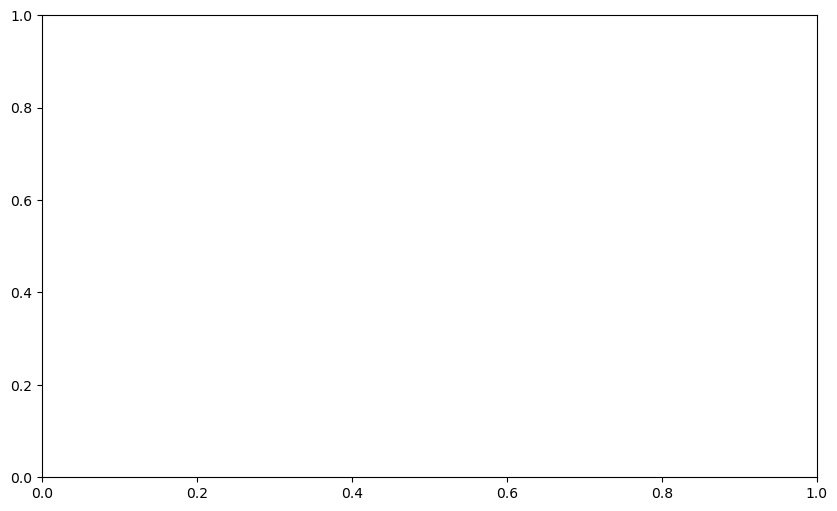

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = 'trial_data_points.csv'

# Read the CSV data from the file
data = pd.read_csv(file_path)

# Set up the figure and axis
fig, ax = plt.subplots()

# Scatter plot with circular markers (balls)
scatter = ax.scatter(data['n_layers'], data['n_units_layer_0'], 
                     s=data['value'] * 1000,  # Adjust bubble size
                     alpha=0.6, edgecolors="w", linewidth=2, marker='o')

# Add text inside the bubbles
for i in range(len(data)):
    ax.text(data['n_layers'][i], data['n_units_layer_0'][i],
            round(data['value'][i], 2), 
            color='black', ha='center', va='center', fontsize=8)

# Set labels and title
ax.set_xlabel("Number of Layers")
ax.set_ylabel("Units in Layer 0")
ax.set_title("Bubble Plot of Layers vs Units with Values")

plt.show()


## Custom

In [6]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Define the search space for hyperparameters
    n_layers = trial.suggest_int('n_layers', 1, 5)
    n_units = [trial.suggest_int(f'n_units_layer_{i}', 5, 200) for i in range(n_layers)]

    # Create an MLPClassifier with the chosen hyperparameters
    model = MLPClassifier(
        hidden_layer_sizes=n_units, 
        max_iter=2000, 
        random_state=42,
        activation='identity' #TODO remove this part if needed

    )

    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model and return accuracy
    accuracy = model.score(X_test, y_test)
    return accuracy

# Set up the study and optimize
study = optuna.create_study(direction='maximize')

# Set the number of trials (iterations) to a custom number (e.g., 50)
number_of_trials = 3  # Change this number as desired
study.optimize(objective, n_trials=number_of_trials)

# Print the best parameters and best accuracy
print("Best parameters:", study.best_params)
print("Best accuracy from optimization:", study.best_value)

[I 2024-10-15 22:39:07,472] A new study created in memory with name: no-name-f95b0679-246a-4336-b900-684ffce662d0


[I 2024-10-15 22:39:08,038] Trial 0 finished with value: 0.875 and parameters: {'n_layers': 3, 'n_units_layer_0': 121, 'n_units_layer_1': 91, 'n_units_layer_2': 125}. Best is trial 0 with value: 0.875.
[I 2024-10-15 22:39:08,297] Trial 1 finished with value: 0.855 and parameters: {'n_layers': 1, 'n_units_layer_0': 35}. Best is trial 0 with value: 0.875.
[I 2024-10-15 22:39:09,200] Trial 2 finished with value: 0.86 and parameters: {'n_layers': 4, 'n_units_layer_0': 124, 'n_units_layer_1': 125, 'n_units_layer_2': 108, 'n_units_layer_3': 175}. Best is trial 0 with value: 0.875.


Best parameters: {'n_layers': 3, 'n_units_layer_0': 121, 'n_units_layer_1': 91, 'n_units_layer_2': 125}
Best accuracy from optimization: 0.875


## Software b) - calculating for the best activation function

Accuracy with 'identity' activation function: 0.8609566184649611


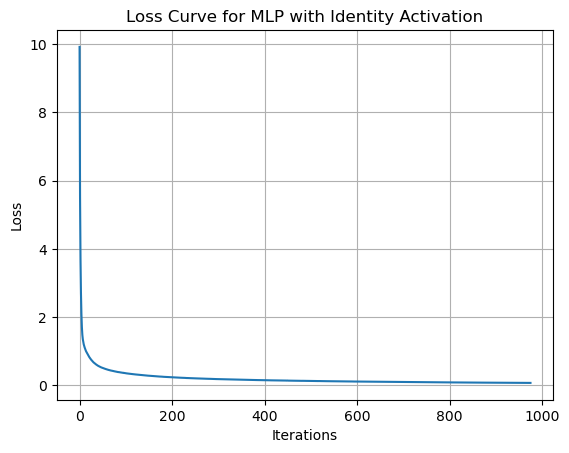

In [7]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()

# Split the data
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, stratify=y, random_state=42)

# Define the MLPClassifier with 'identity' activation function
predictor_identity = MLPClassifier(hidden_layer_sizes=(10, 4), 
                                    activation='identity', 
                                    solver='sgd', 
                                    max_iter=2000, 
                                    random_state=42)

# Fit the model
predictor_identity.fit(X_train, y_train)

# Make predictions on the test set
y_pred_identity = predictor_identity.predict(X_test)

# Calculate accuracy
accuracy_identity = accuracy_score(y_test, y_pred_identity)
print("Accuracy with 'identity' activation function:", accuracy_identity)

# Plot the loss curve
plt.plot(predictor_identity.loss_curve_)
plt.title('Loss Curve for MLP with Identity Activation')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Double comparison

[I 2024-10-15 22:28:48,579] A new study created in memory with name: no-name-8621fd2f-45e3-486e-aa3d-68f2c06911cf
[I 2024-10-15 22:28:51,056] Trial 0 finished with value: 0.865 and parameters: {'n_layers': 4, 'n_units_layer_0': 172, 'n_units_layer_1': 30, 'n_units_layer_2': 172, 'n_units_layer_3': 115}. Best is trial 0 with value: 0.865.


Trial 0: Default Accuracy = 0.8100, Identity Accuracy = 0.8650


[I 2024-10-15 22:28:54,223] Trial 1 finished with value: 0.86 and parameters: {'n_layers': 5, 'n_units_layer_0': 162, 'n_units_layer_1': 76, 'n_units_layer_2': 166, 'n_units_layer_3': 57, 'n_units_layer_4': 139}. Best is trial 0 with value: 0.865.


Trial 1: Default Accuracy = 0.8450, Identity Accuracy = 0.8600


[I 2024-10-15 22:28:58,000] Trial 2 finished with value: 0.855 and parameters: {'n_layers': 3, 'n_units_layer_0': 25, 'n_units_layer_1': 35, 'n_units_layer_2': 177}. Best is trial 0 with value: 0.865.


Trial 2: Default Accuracy = 0.8000, Identity Accuracy = 0.8550


[I 2024-10-15 22:29:03,800] Trial 3 finished with value: 0.855 and parameters: {'n_layers': 1, 'n_units_layer_0': 128}. Best is trial 0 with value: 0.865.


Trial 3: Default Accuracy = 0.8100, Identity Accuracy = 0.8550


[I 2024-10-15 22:29:06,765] Trial 4 finished with value: 0.865 and parameters: {'n_layers': 4, 'n_units_layer_0': 69, 'n_units_layer_1': 8, 'n_units_layer_2': 109, 'n_units_layer_3': 149}. Best is trial 0 with value: 0.865.


Trial 4: Default Accuracy = 0.8050, Identity Accuracy = 0.8650


[I 2024-10-15 22:29:09,781] Trial 5 finished with value: 0.855 and parameters: {'n_layers': 2, 'n_units_layer_0': 95, 'n_units_layer_1': 100}. Best is trial 0 with value: 0.865.


Trial 5: Default Accuracy = 0.8350, Identity Accuracy = 0.8550


[I 2024-10-15 22:29:13,250] Trial 6 finished with value: 0.855 and parameters: {'n_layers': 5, 'n_units_layer_0': 175, 'n_units_layer_1': 188, 'n_units_layer_2': 57, 'n_units_layer_3': 66, 'n_units_layer_4': 15}. Best is trial 0 with value: 0.865.


Trial 6: Default Accuracy = 0.8500, Identity Accuracy = 0.8550


[I 2024-10-15 22:29:19,662] Trial 7 finished with value: 0.855 and parameters: {'n_layers': 1, 'n_units_layer_0': 182}. Best is trial 0 with value: 0.865.


Trial 7: Default Accuracy = 0.8000, Identity Accuracy = 0.8550


[I 2024-10-15 22:29:22,230] Trial 8 finished with value: 0.865 and parameters: {'n_layers': 4, 'n_units_layer_0': 153, 'n_units_layer_1': 78, 'n_units_layer_2': 170, 'n_units_layer_3': 13}. Best is trial 0 with value: 0.865.


Trial 8: Default Accuracy = 0.8500, Identity Accuracy = 0.8650


[I 2024-10-15 22:29:24,774] Trial 9 finished with value: 0.86 and parameters: {'n_layers': 5, 'n_units_layer_0': 62, 'n_units_layer_1': 130, 'n_units_layer_2': 20, 'n_units_layer_3': 36, 'n_units_layer_4': 95}. Best is trial 0 with value: 0.865.


Trial 9: Default Accuracy = 0.8150, Identity Accuracy = 0.8600
Best parameters: {'n_layers': 4, 'n_units_layer_0': 172, 'n_units_layer_1': 30, 'n_units_layer_2': 172, 'n_units_layer_3': 115}
Best accuracy from optimization: 0.865


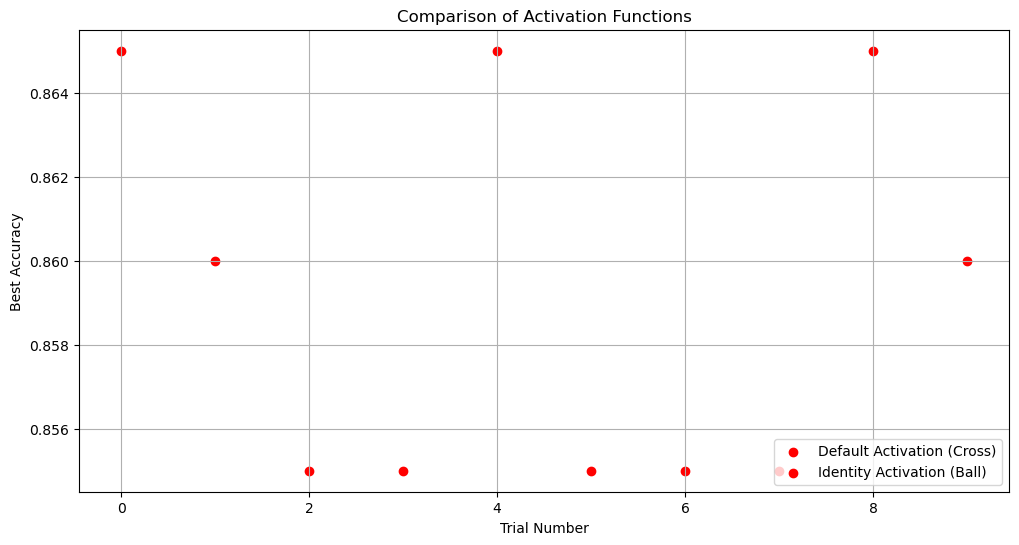

In [5]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list to store results
results = []

def objective(trial):
    # Define the search space for hyperparameters
    n_layers = trial.suggest_int('n_layers', 1, 5)
    n_units = [trial.suggest_int(f'n_units_layer_{i}', 5, 200) for i in range(n_layers)]
    
    # Test with the default activation function
    model_default = MLPClassifier(hidden_layer_sizes=n_units, max_iter=2000, random_state=42)
    model_default.fit(X_train, y_train)
    accuracy_default = model_default.score(X_test, y_test)

    # Test with the identity activation function
    model_identity = MLPClassifier(hidden_layer_sizes=n_units, activation='identity', max_iter=2000, random_state=42)
    model_identity.fit(X_train, y_train)
    accuracy_identity = model_identity.score(X_test, y_test)

    # Store results for comparison
    results.append({
        'trial': trial.number,
        'accuracy_default': accuracy_default,
        'accuracy_identity': accuracy_identity,
        'better': 'default' if accuracy_default > accuracy_identity else 'identity'
    })

    # Print accuracies for debugging
    print(f"Trial {trial.number}: Default Accuracy = {accuracy_default:.4f}, Identity Accuracy = {accuracy_identity:.4f}")

    return max(accuracy_default, accuracy_identity)

# Set up the study and optimize
study = optuna.create_study(direction='maximize')

# Set the number of trials (iterations) to a custom number (e.g., 10)
number_of_trials = 10  # Change this number as desired
study.optimize(objective, n_trials=number_of_trials)

# Print the best parameters and best accuracy
print("Best parameters:", study.best_params)
print("Best accuracy from optimization:", study.best_value)

# Visualize results
trial_numbers = [r['trial'] for r in results]
default_accuracies = [r['accuracy_default'] for r in results]
identity_accuracies = [r['accuracy_identity'] for r in results]
better_methods = ['default' if r['better'] == 'default' else 'identity' for r in results]

# Create scatter plot
plt.figure(figsize=(12, 6))
for i in range(len(results)):
    # Use a cross for default activation and a ball for identity activation
    marker = 'x' if better_methods[i] == 'default' else 'o'  # 'x' for default, 'o' for identity
    color = 'blue' if better_methods[i] == 'default' else 'red'
    plt.scatter(trial_numbers[i], max(default_accuracies[i], identity_accuracies[i]), color=color, marker=marker)

plt.title('Comparison of Activation Functions')
plt.xlabel('Trial Number')
plt.ylabel('Best Accuracy')
plt.legend(['Default Activation (Cross)', 'Identity Activation (Ball)'], loc='lower right')
plt.grid()
plt.show()


# Final code version

[I 2024-10-16 20:40:45,507] A new study created in memory with name: no-name-70f656b5-fdc2-4a28-b4db-73a2d598aab4


Train size: 898 
Test size: 899


[I 2024-10-16 20:40:46,761] Trial 0 finished with value: 0.10122358175750834 and parameters: {'n_layers': 5, 'n_units_layer_0': 104, 'n_units_layer_1': 92, 'n_units_layer_2': 96, 'n_units_layer_3': 54, 'n_units_layer_4': 102}. Best is trial 0 with value: 0.10122358175750834.
[I 2024-10-16 20:40:47,916] Trial 1 finished with value: 0.10122358175750834 and parameters: {'n_layers': 3, 'n_units_layer_0': 36, 'n_units_layer_1': 63, 'n_units_layer_2': 34}. Best is trial 0 with value: 0.10122358175750834.
[I 2024-10-16 20:40:59,609] Trial 2 finished with value: 0.9777530589543938 and parameters: {'n_layers': 1, 'n_units_layer_0': 73}. Best is trial 2 with value: 0.9777530589543938.


Best parameters: {'n_layers': 1, 'n_units_layer_0': 73}
Best accuracy from optimization: 0.9778
Accuracy on testing set (Optimized MLPClassifier): 0.9778


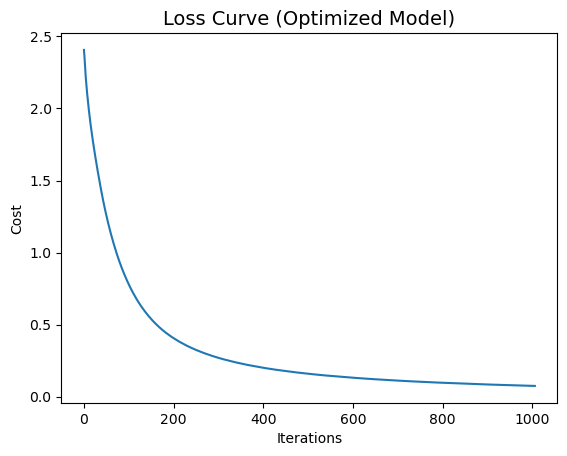

Final loss curve value (Optimized Model): 0.07508521251384367


ValueError: s must be a scalar, or float array-like with the same size as x and y

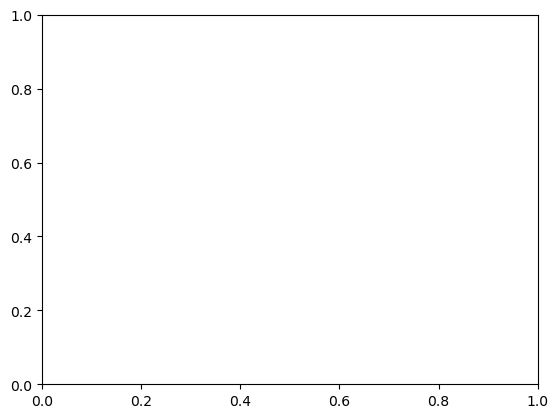

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import optuna
import re

# Custom data
gn = 9

# 1. Load data (digits dataset)
dt = datasets.load_digits() 
X, y = dt.data, dt.target

# Partition data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, stratify=y, random_state=gn)
print("Train size:", len(X_train), "\nTest size:", len(X_test))

# Define the objective function for Bayesian Optimization
def objective(trial):
    # Sample the number of hidden layers and their sizes
    n_layers = trial.suggest_int('n_layers', 1, 5)
    layer_sizes = [trial.suggest_int(f'n_units_layer_{i}', 16, 128) for i in range(n_layers)]
    
    # Define the MLPClassifier with the sampled hidden layer sizes
    predictor = MLPClassifier(hidden_layer_sizes=tuple(layer_sizes), 
                              random_state=9, 
                              activation='logistic', 
                              solver='sgd', 
                              max_iter=2000)
    # Fit the classifier
    predictor.fit(X_train, y_train)
    
    # Predict on the test set and calculate accuracy
    y_pred = predictor.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    return accuracy

# Set up Bayesian Optimization using Optuna
study = optuna.create_study(direction='maximize')  # We want to maximize the accuracy
study.optimize(objective, n_trials=30)  # Perform 30 trials

# Output the best parameters and the best score
print(f"Best parameters: {study.best_params}")
print(f"Best accuracy from optimization: {study.best_value:.4f}")

# Train the best model with the optimized parameters
best_params = study.best_params
best_layer_sizes = [best_params[f'n_units_layer_{i}'] for i in range(best_params['n_layers'])]

best_model = MLPClassifier(hidden_layer_sizes=tuple(best_layer_sizes),
                           random_state=9,
                           activation='logistic',
                           solver='sgd',
                           max_iter=2000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Print the final accuracy
print("Accuracy on testing set (Optimized MLPClassifier):", round(metrics.accuracy_score(y_test, y_pred), 4))

# Plot the loss curve
plt.plot(best_model.loss_curve_)
plt.title("Loss Curve (Optimized Model)", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Print the final loss curve value
print("Final loss curve value (Optimized Model):", best_model.loss_curve_[-1])

# Parse trial logs
trial_data = study.trials
parsed_trials = []

# Extract trial info
for trial in trial_data:
    trial_str = str(trial)
    value_match = re.search(r"value: ([\d.]+)", trial_str)
    params_match = re.search(r"params: {(.*?)}", trial_str)

    if value_match and params_match:
        z_value = float(value_match.group(1))
        params_str = params_match.group(1)
        params = eval(f"{{{params_str}}}")
        
        n_layers = params.get('n_layers', 0)
        n_units_layer_0 = params.get('n_units_layer_0', 0)
        parsed_trials.append((n_layers, n_units_layer_0, z_value))

# Visualize the trial data as a bubble plot directly (No CSV read/write needed)
trial_df = pd.DataFrame(parsed_trials, columns=["n_layers", "n_units_layer_0", "value"])

# Set up the figure and axis
fig, ax = plt.subplots()

# Scatter plot with circular markers (balls)
scatter = ax.scatter(trial_df['n_layers'], trial_df['n_units_layer_0'], 
                     s=trial_df['value'] * 1000,  # Adjust bubble size
                     alpha=0.6, edgecolors="w", linewidth=2, marker='o')

# Add text inside the bubbles
for i in range(len(trial_df)):
    ax.text(trial_df['n_layers'][i], trial_df['n_units_layer_0'][i],
            round(trial_df['value'][i], 2), 
            color='black', ha='center', va='center', fontsize=8)

# Set labels and title
ax.set_xlabel("Number of Layers")
ax.set_ylabel("Units in Layer 0")
ax.set_title("Bubble Plot of Layers vs Units with Values")

plt.show()